# Airbnb in Beijing

## Introduction
**A‌i‌r‌b‌n‌b‌,‌ ‌I‌n‌c‌.‌**, is an  [online marketplace](https://en.wikipedia.org/wiki/Online_marketplace) and [hospitality service](https://en.wikipedia.org/wiki/Hospitality_service) [brokerage](https://en.wikipedia.org/wiki/Brokerage) company, It has a cool brand story, with hosts sharing their extra living space, guests living for a fee, and allowing guests to experience real local life instead of booking a hotel.  It sounds really cool, but  what is the real situation in Beijing? I have downloaded the dataset of Airbnb in Beijing via [Inside Airbnb](http://insideairbnb.com/). Now, Let's dig up some truth about Airbnb in Beijing.

## Business Understanding

If we want to know that the business development of Airbnb in Beijing, we can start from the following three aspects: **Listings** ,**Hosts** and **Guests**. But we don't have the data of guests, so we focus on these two parts:  
- **Listings**  
The development of numbers of listings are signals of business development, if the numbers of listings is getting more and more and the speed of increase is getting faster and faster, the business of Airbnb in Beijing is stronger and stronger. Maybe we can find seasonal variations of the price which can help marketing department to market at the right time.

- **Hosts**  
The hosts are so important because they will connect guests face-to-face, the quality of the hosts' service determines whether guests will believe the Airbnb. So, we will make segmentation of host types to mining the relations between host types and host service.  

## Data Understanding

To answer the questions above we need to look into the data and provide some visualization to our fellow travelers.  
- To answer the questions about listings, we can filter the data of numbers of listings in different years and different districts, and provide a line plot to visualize the variation. As for the prices, we should also visualize amount of increase and decrease on the basis of ploting line charts.
- To answer the questions about hosts, we need to categorize the host types by their own listings number, and then we can look into the percentage of each host types and evaluate their sevice by response rate, response time and review score.



# Prepare Data

After understanding the data and knowing which variables take essential roles in knowing the development of  AirBnb in Beijing, we start preparing our data for mining. We first explore data to know features' name ,dtype and problem, and then we clean it which is suitable for data mining.


## Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyecharts.options as opts
from pyecharts.charts import Page, Pie, Line, Boxplot, Grid, Bar, Geo, Scatter, HeatMap, Kline
from pyecharts.globals import ChartType, SymbolType

%matplotlib inline

In [15]:
pd.set_option('max_columns',300)
pd.set_option('max_rows',100)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
beijing_reviews = pd.read_csv('./data/Beijing/reviews.csv')
beijing_listings = pd.read_csv('./data/Beijing/listings.csv')
beijing_calendar = pd.read_csv('./data/Beijing/calendar.csv')

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (43,61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
beijing_calendar.head()

listing_id        date available      price adjusted_price  minimum_nights  \
0    17535823  2019-02-11         t  $1,880.00      $1,880.00               1   
1    17535823  2019-02-12         f  $1,880.00      $1,880.00               1   
2    17535823  2019-02-13         t  $1,880.00      $1,880.00               1   
3    17535823  2019-02-14         t  $1,880.00      $1,880.00               1   
4    17535823  2019-02-15         t  $2,180.00      $2,180.00               1   

   maximum_nights  
0            1125  
1            1125  
2            1125  
3            1125  
4            1125

In [7]:
beijing_calendar.date.max()

'2020-02-10'

In [8]:
beijing_calendar.date.min()

'2019-02-11'

In [9]:
beijing_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9461165 entries, 0 to 9461164
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 505.3+ MB


In [10]:
beijing_reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0       44054    84748  2010-08-25       207019        Jarrod   
1       44054   118384  2010-10-13       218723      Kimberly   
2       44054   436978  2011-08-11       609177          Emma   
3       44054  1118657  2012-04-12      1787536      Andreyna   
4       44054  2140650  2012-08-30      1179565       Frances   

                                            comments  
0  Sev was very helpful.  Sev showed us where to ...  
1  We arrived in Beijing very early in the mornin...  
2  It is a really massive apartment and really co...  
3  Sev was incredibly helpful, showed us around t...  
4  The appartment was ideal for our party of 6 ad...

In [11]:
beijing_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180561 entries, 0 to 180560
Data columns (total 6 columns):
listing_id       180561 non-null int64
id               180561 non-null int64
date             180561 non-null object
reviewer_id      180561 non-null int64
reviewer_name    180555 non-null object
comments         180458 non-null object
dtypes: int64(3), object(3)
memory usage: 8.3+ MB


In [6]:
beijing_listings.id.nunique()

25921

Simply browse through the data and discover:
- Three datasets can be merged with the `listing_id` as a common key;

- There are many issues in dataset, such as useless variables for analysis ,missing data, incorrect data types and so on;

We can analyze from two angles:
- As a guest, how do we choose the most cost-effective listings? 
- As a host, how do we improve our listings price?

## Clean Data
### Deal with  Useless Features
Some features don't help with analysis or prediction (such as the various links in the listings table), as well as some features with high repetition rates (such as ' last_scraped ', ' space ' and ' description '), and the entire column are variables of missing values (such as ' Neighbourhood_group_cleansed ') ,we need to drop them.

In [13]:
beijing_listings.head(1)

id                         listing_url       scrape_id last_scraped  \
0  44054  https://www.airbnb.com/rooms/44054  20190211162202   2019-02-11   

                                   name  \
0  Modern and Comfortable Living in CBD   

                                             summary  \
0  East Apartments offers comfortable living away...   

                                               space  \
0  East Apartments is a western managed serviced ...   

                                         description experiences_offered  \
0  East Apartments offers comfortable living away...                none   

                               neighborhood_overview  \
0  The neighborhood is a private compound.  Just ...   

                                               notes  \
0  *For long term reservations (over 90 days), pl...   

                                             transit  \
0  The easiest method to get around is by taxi or...   

                                         access interaction  \
0  *Guests have access to the Fulicheng gardens         NaN   

                                         house_rules  thumbnail_url  \
0  Registration All guests are required to have a...            NaN   

   medium_url                                        picture_url  \
0         NaN  https://a0.muscache.com/im/pictures/ccadd958-6...   

   xl_picture_url  host_id                                  host_url  \
0             NaN   192875  https://www.airbnb.com/users/show/192875   

         host_name  host_since            host_location  \
0  East Apartments  2010-08-06  Beijing, Beijing, China   

                                          host_about host_response_time  \
0  Hi everyone!  My name is Sev.  I'm the Owner/O...     within an hour   

  host_response_rate  host_acceptance_rate host_is_superhost  \
0               100%                   NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/9ea49dd1-d...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/9ea49dd1-d...         Shuangjing   

   host_listings_count  host_total_listings_count  \
0                   10                         10   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   

  host_identity_verified                   street neighbourhood  \
0                      f  Beijing, Beijing, China    Shuangjing   

  neighbourhood_cleansed  neighbourhood_group_cleansed     city    state  \
0         朝阳区 / Chaoyang                           NaN  Beijing  Beijing   

  zipcode   market  smart_location country_code country  latitude   longitude  \
0  100022  Beijing  Beijing, China           CN   China  39.89503  116.451635   

  is_location_exact       property_type        room_type  accommodates  \
0                 t  Serviced apartment  Entire home/apt             9   

   bathrooms  bedrooms  beds  bed_type  \
0        2.0       3.0   4.0  Real Bed   

                                           amenities  square_feet    price  \
0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...       1464.0  $796.00   

  weekly_price monthly_price security_deposit cleaning_fee  guests_included  \
0    $7,979.00    $26,305.00          $674.00       $67.00                7   

  extra_people  minimum_nights  maximum_nights  minimum_minimum_nights  \
0       $67.00               1             365                       1   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                       1                     365                     365   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_updated  \
0                     1.0                   365.0      2 weeks ago   

  has_availability  availability_30  availability_60  availability_90  \
0                t               24               

In [14]:
url_features = [col for col in beijing_listings.columns if 'url' in col]

In [99]:
useless_features = ['scrape_id','zipcode','country_code','minimum_minimum_nights','maximum_minimum_nights',
                   'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                   'calendar_updated','last_scraped','space','description','host_neighbourhood','city','state','market',
                   'smart_location','country','calendar_last_scraped','calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                   'calculated_host_listings_count_shared_rooms','has_availability','availability_30','availability_60',
                    'availability_90','first_review','last_review','review_scores_accuracy',
                    'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                    'review_scores_value','host_location','street','neighbourhood','interaction','host_total_listings_count']

In [16]:
useless_features = url_features + useless_features

In [17]:
beijing_listings_clean = beijing_listings.drop(useless_features,axis=1)

In [18]:
(beijing_listings_clean.isna().sum()/beijing_listings_clean.shape[0]).plot(kind='hist');

In [19]:
outlier_cols = beijing_listings_clean.columns[(beijing_listings_clean.isna().sum()/beijing_listings_clean.shape[0] > 0.8)]
outlier_cols

Index(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet',
       'weekly_price', 'monthly_price', 'license', 'jurisdiction_names'],
      dtype='object')

In [20]:
beijing_listings_clean = beijing_listings_clean.drop(outlier_cols,axis=1)

### Deal with features with only one unique data

Categorical features including id, experiences_offered, host_response_time, host_is_superhost, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, is_location_exact, property_type, room_type, bed_type, amenities(need to be splited), requires_license, instant_bookable, is_business_travel_ready, cancellation_policy,
require_guest_profile_picture, require_guest_phone_verification

In [21]:
categorical_features = ['id', 'experiences_offered', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic',
                        'host_identity_verified',  'neighbourhood_cleansed', 'is_location_exact',
                        'property_type', 'room_type', 'bed_type', 'amenities', 'requires_license', 'instant_bookable',
                        'is_business_travel_ready', 'cancellation_policy','require_guest_profile_picture', 
                        'require_guest_phone_verification']

In [22]:
def nuniques(col):
    """
    Check the number of unique data in column
    of beijing_listings_clean

    Args:
        col(str): column name.

    Returns:
        number of unique data in column.
    """
    num = beijing_listings_clean[col].nunique()    
    print(f'Column {col} has {num} unique data.')
    return num

In [23]:
one_unique_cols = [col for col in categorical_features if nuniques(col)==1]
one_unique_cols

Column id has 25921 unique data.
Column experiences_offered has 1 unique data.
Column host_response_time has 4 unique data.
Column host_is_superhost has 2 unique data.
Column host_has_profile_pic has 2 unique data.
Column host_identity_verified has 2 unique data.
Column neighbourhood_cleansed has 16 unique data.
Column is_location_exact has 2 unique data.
Column property_type has 41 unique data.
Column room_type has 3 unique data.
Column bed_type has 5 unique data.
Column amenities has 21699 unique data.
Column requires_license has 1 unique data.
Column instant_bookable has 2 unique data.
Column is_business_travel_ready has 1 unique data.
Column cancellation_policy has 3 unique data.
Column require_guest_profile_picture has 2 unique data.
Column require_guest_phone_verification has 2 unique data.


['experiences_offered', 'requires_license', 'is_business_travel_ready']

There are some features only has an unique data,it's meaningless，drop them.

In [24]:
beijing_listings_clean = beijing_listings_clean.drop(one_unique_cols,axis=1)

### Deal with `amenities`

In [25]:
beijing_listings_clean.amenities[0]

'{TV,"Cable TV",Internet,Wifi,"Air conditioning","Wheelchair accessible",Kitchen,"Pets allowed",Elevator,"Free street parking","Buzzer/wireless intercom",Heating,"Family/kid friendly","Suitable for events",Washer,"Smoke detector","Carbon monoxide detector","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Smart lock","Children’s books and toys",Crib,"Hot water","Luggage dropoff allowed","Long term stays allowed","Paid parking on premises"}'

There are lots of features in `amenities`, such as TV,Wifi and so on, we should split them.

In [26]:
#get all amenities
all_amenities = set()
for i in beijing_listings_clean['amenities']:
    try:
        all_amenities.update(i.replace('{','').replace('}','').replace('"','').split(','))
    except:
        print(i)

In [27]:
#remove meaningless data
meaningless_data = ['','translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50']
for data in meaningless_data:
    all_amenities.remove(data)

In [28]:
for amenity in all_amenities:
    beijing_listings_clean[amenity] = beijing_listings_clean['amenities'].str.contains(amenity).apply(lambda x:1 if x else 0)

In [29]:
beijing_listings_clean = beijing_listings_clean.drop('amenities',axis=1)

In [30]:
beijing_listings_clean[all_amenities].mean().sort_values(ascending=False)[:10]

Wifi                0.968288
Air conditioning    0.947571
Essentials          0.940126
Heating             0.934185
Shampoo             0.904479
Washer              0.899657
Hangers             0.882991
Hair dryer          0.861039
Kitchen             0.829405
TV                  0.786042
dtype: float64

In [31]:
beijing_listings_clean[all_amenities].mean().sort_values()[:10]

Dog(s)                0.000000
Other pet(s)          0.000000
Cat(s)                0.000000
Murphy bed            0.000039
Private pool          0.000039
Tennis court          0.000039
Mudroom               0.000039
Exercise equipment    0.000039
Fire pit              0.000039
Mountain view         0.000039
dtype: float64

- Basic appliances(Wifi, Air conditioning, Washer, Hair dryer and TV) and bathroom amenities( Essentials, Shampoo, Hangers)are TOP amenities. These are all necessities of living.
- But some of the more advanced requirements, such as pets, exercise are all at bottom.

### Deal with `host_verifications`

In [32]:
beijing_listings_clean.host_verifications[0]

"['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']"

Same as `amenities`, there are more than one feature in `host_verifications`, so we need to split them.

In [33]:
all_verifications = set()
for i in beijing_listings_clean['host_verifications']:
    all_verifications.update(eval(i))

In [34]:
for verification in all_verifications:
    beijing_listings_clean[f'{verification}_verification'] = beijing_listings_clean['host_verifications'].str.contains(verification).apply(lambda x:1 if x else 0)

In [35]:
beijing_listings_clean = beijing_listings_clean.drop('host_verifications',axis=1)

### Deal with symbols in numrical features

In [36]:
#replace %
beijing_listings_clean.host_response_rate = beijing_listings_clean.host_response_rate.str.replace('%','')

In [84]:
price_features = ['price','security_deposit','cleaning_fee','extra_people']

In [38]:
def remove_dollar(x):
    """
    Remove dollar symbols and comma in string

    Args:
        x(str): string need to be processed.

    Returns:
        string that have been processed.
    """
    x = str(x)
    try:
#         if '$' in x:
        if ',' in x:
            return(float(x.replace('$','').replace(',','')))
        else:
            return (float(x.replace('$','')))
    except:
        return x

In [90]:
beijing_listings_clean[price_features] = beijing_listings_clean[price_features].applymap(remove_dollar)

### Replace `t/f` to `1/0`

In [38]:
tf_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for column in tf_cols:
    beijing_listings_clean[column] = beijing_listings_clean[column].str.replace('t','1').str.replace('f','0')

### Deal with datetime dtype

In [39]:
beijing_listings_clean.host_since = pd.to_datetime(beijing_listings_clean.host_since)

### Deal with `neighbourhood_cleansed`
There are two kinds of expressions in this feature, one is in English and the other one is in Chinese. Let's translate all of them to Chinese.

In [40]:
beijing_listings_clean.neighbourhood_cleansed = beijing_listings_clean.neighbourhood_cleansed.str.split(' / ').str[0]

In [41]:
beijing_listings_clean.neighbourhood_cleansed.unique()

array(['朝阳区', '密云县', '东城区', '西城区', '海淀区', '顺义区', '房山区', '石景山区', '通州区',
       '怀柔区', '昌平区', '丰台区', '大兴区', '延庆县', '门头沟区', '平谷区'], dtype=object)

In [42]:
beijing_listings_clean.to_excel('beijing_listings_clean_data.xlsx',index=False)

## EDA of Listings Dataset 

### Single Feature

#### Which is the favorite word of hosts in Beijing ?

- Word Cloud  
We'll deal with some text features, get their wordclouds, and learn that those words appear most frequently.

In [3]:
beijing_listings_clean = pd.read_excel('beijing_listings_clean_data.xlsx')

In [4]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud, ImageColorGenerator

In [10]:
# set word cloud
back_coloring_path = "airbnblogo.jpeg" # back ground pic
stopwords_path = 'stopwords.txt' # stopwords
font_path = 'msyh.ttf'
back_coloring = imread(back_coloring_path)

wc = WordCloud(font_path=font_path,
               background_color="white", 
               max_words=1000,
               mask=back_coloring, 
               max_font_size=300, 
               random_state=42, width=3000, height=2580, margin=2) 

In [11]:
#split words
def add_word(l):
    """
    Add words from list into jieba.

    Args:
        l(list): words list.
    """
    for items in l: 
        jieba.add_word(items) 
        
def jiebaclearText(text): 
    """
    Split text to single words by jiaba.

    Args:
        text(str): string need to be processed.

    Returns:
        A string with single words.
    """
    mywordlist = [] 
    seg_list = jieba.cut(text, cut_all=False) 
    liststr="/ ".join(seg_list) 
    f_stop = open(stopwords_path) 
    try: 
        f_stop_text = f_stop.read( ) 
    finally: 
        f_stop.close( ) 
    f_stop_seg_list=f_stop_text.split('\n') + ['号线','nan','nannan','nannannan','小时','分钟','期间','时间','hidden','Airbnb','距离','车程']
    for myword in liststr.split('/'): 
        if not(myword.strip() in f_stop_seg_list) and len(myword.strip())>1: 
            mywordlist.append(myword) 
    return ''.join(mywordlist) 

In [12]:
#draw word cloud
def drawwordcloud(name_text,title):
    """
    Plot a wordcloud using words' string.

    Args:
        name_text(str): words.
        title(str): title of wordcloud.

    Returns:
        Plot a wordcloud.
    """
    text = jiebaclearText(name_text) 
    save_path = f'./wordclouds/{title}.jpg'
    add_word(['朝阳大悦城','太古里'])
    wc.generate(text) 
    image_colors = ImageColorGenerator(back_coloring) 
    plt.figure(figsize=(20,11)) 
    plt.imshow(wc.recolor(color_func=image_colors)) 
    plt.axis("off")
    plt.title(title)
    plt.savefig(save_path);

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.718 seconds.
Prefix dict has been built succesfully.


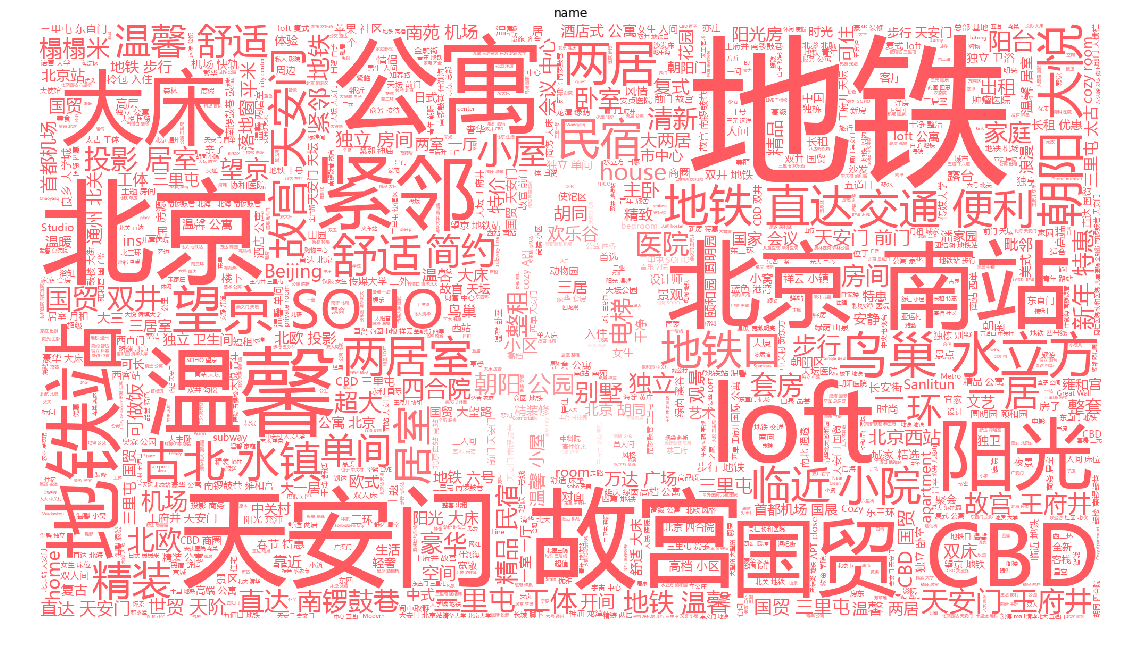

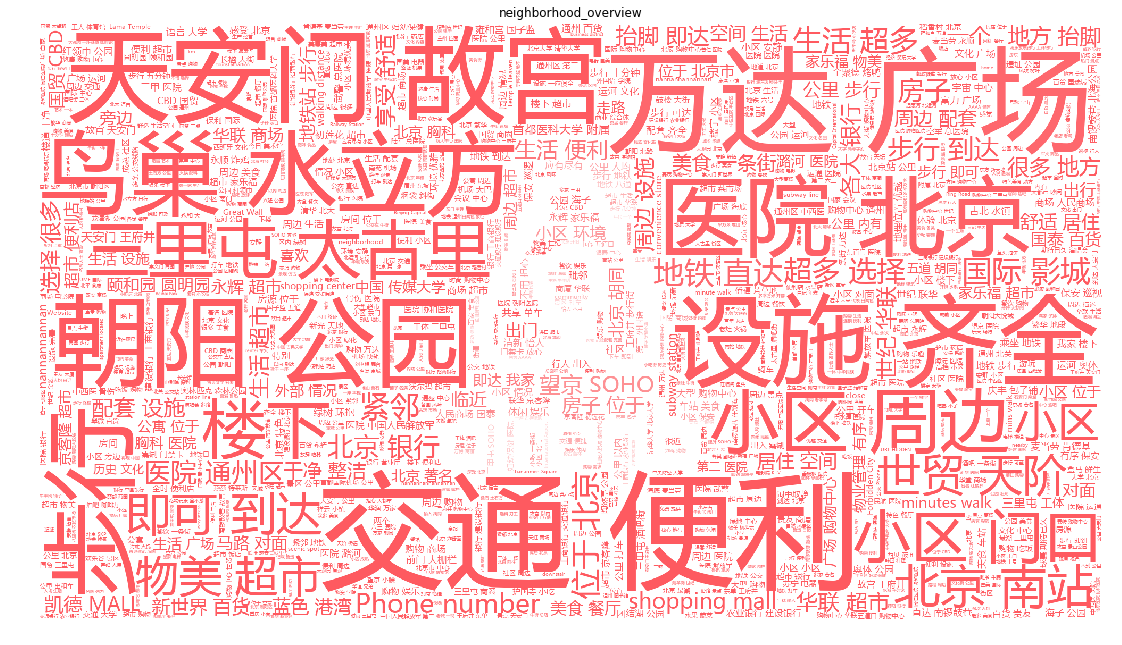

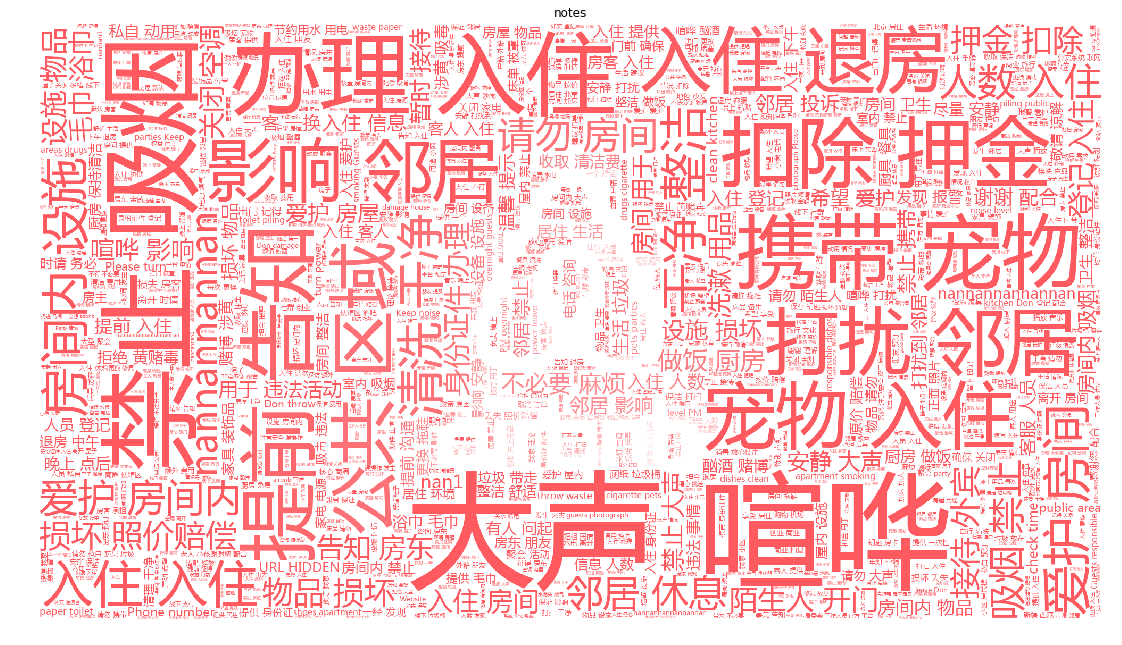

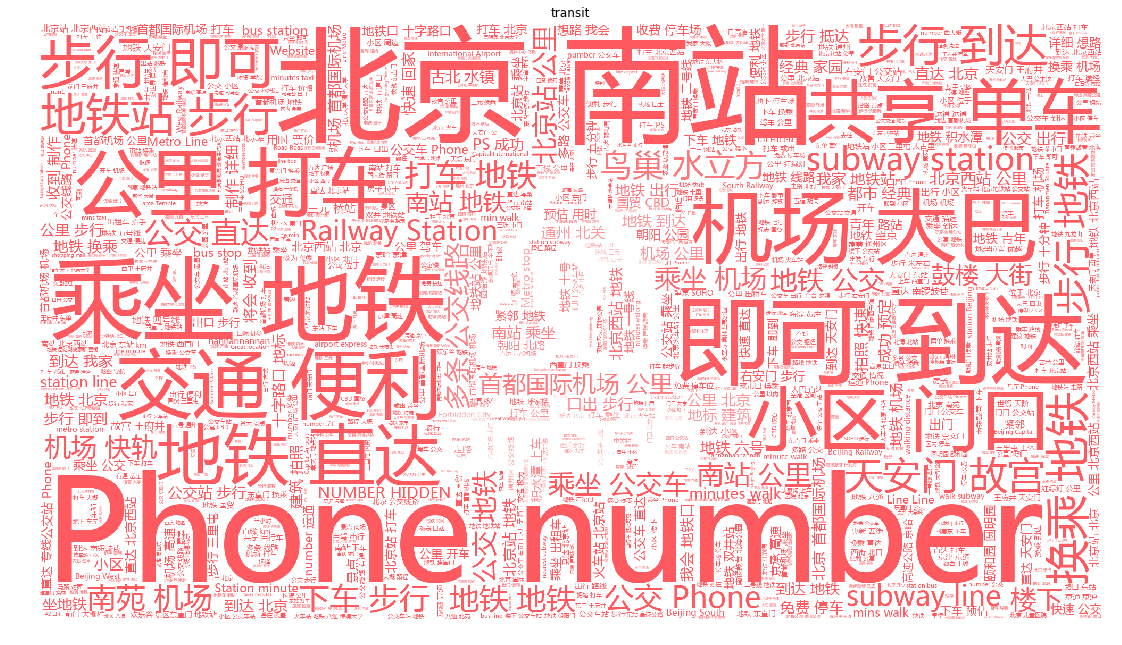

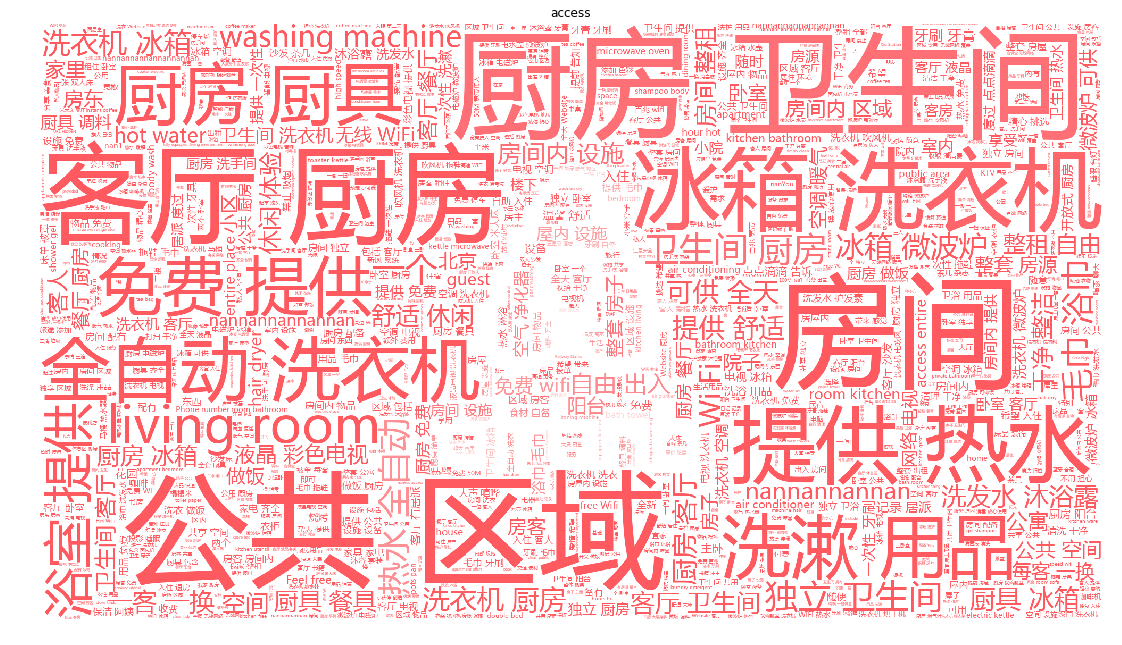

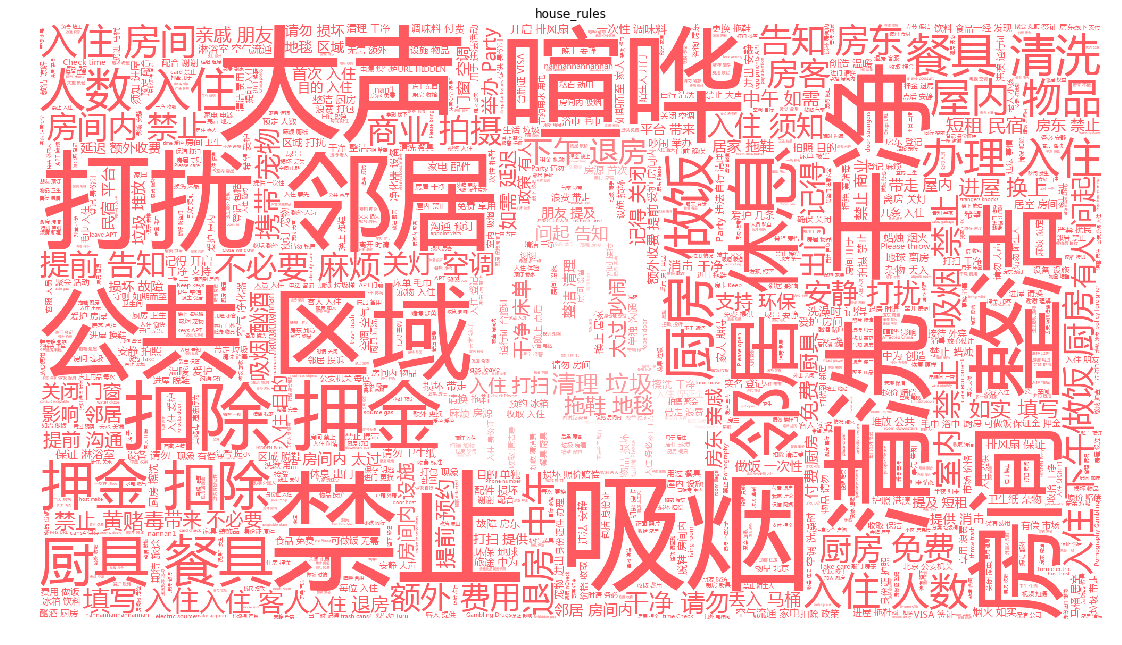

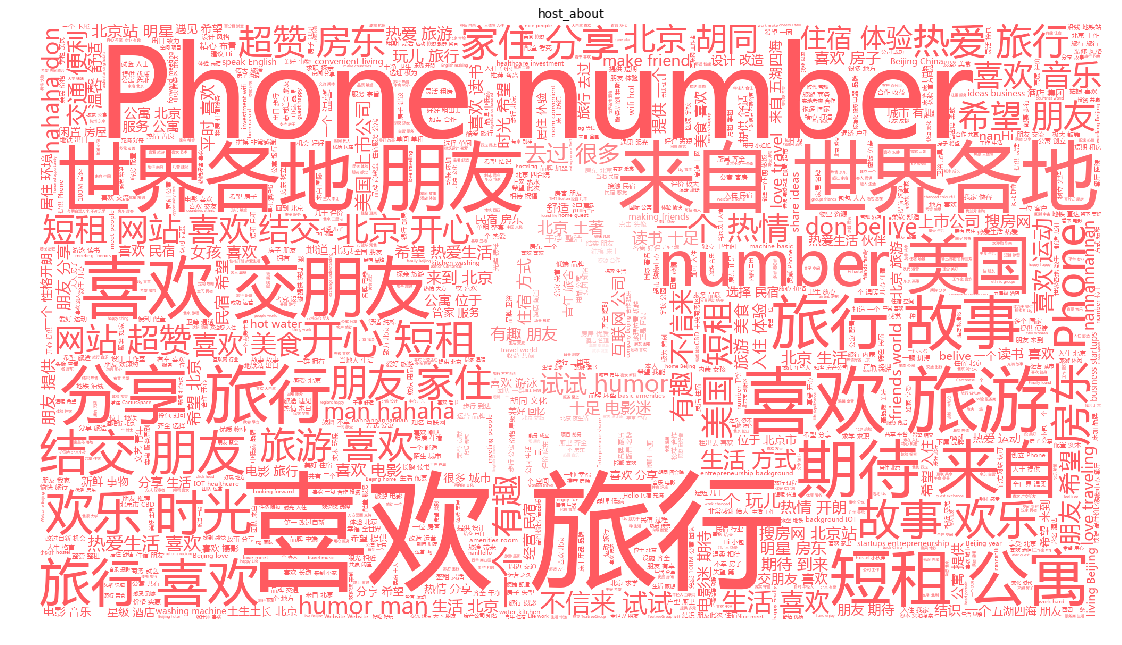

In [13]:
word_cols = ['name', 'summary', 'neighborhood_overview', 'notes', 'transit','access', 'house_rules', 'host_about']
for col in word_cols:
    text = ''.join(list(beijing_listings_clean[col].astype(str)))
    drawwordcloud(text,col)

As we can see in the above pictures:
- **name**: Most of names contain the location or nearby attractions(Tiananmen, Palace museum, Guomao, Wangjing are the most frequently location); Besides, room type(loft apartment) ,room environment(The hosts love warmth and sunshine most) and transit are always mentioned in the names.
- **summary**: Room amenities, cleanliness and traffic information are described most.
- **neighborhood_overview**: The most frequently nearby attractions are Wanda Square, Tiananmen, Chaoyang Park, Sanlitun.
- **notes**: It's mainly emphasized before and after the check-in, the most frequent rules are about noise, smoking and pets, and if a guest violates the notes, he will be punished with a deposit deduction probably.
- **transit**: It mentions hsr, airplane, subway and shared cycling, and kindly most hosts provide a phone number in order to keep in touch.
- **access**: Public area, refrigerator, washing machine, kitchen, hot water are most frequently mentioned in access.
- **house_rules**: It's familiar with **notes**.
- **host_about**: Most hosts like to put a label "like to make friends" or "like to travel" on theirselves.

#### How is Airbnb in Beijing developing?

In [4]:
beijing_listings_clean['year_month'] = beijing_listings_clean.host_since.apply(lambda x:x.strftime('%Y-%m'))

In [5]:
time_series = beijing_listings_clean.groupby('year_month')['id'].count().cumsum()

In [6]:
def line_base(data,lable_1,lable_2,title):
    """
    Line plot with two variables.

    Args:
        data(Series): data to plot.
        lable_1(str): the first variable's name.
        lable_2(str): the second variable's name.
        title(str): title of the plot.

    Returns:
        Line plot.
    """
    increase_speed = data.shift(-1) - data
    #moving mean in window==7
    increase_speed = increase_speed.rolling(window=7).mean()
    c = (
        Line()
        .add_xaxis(list(data.index))
        .add_yaxis(lable_1, list(data),
                   label_opts=opts.LabelOpts(is_show=False))
        .extend_axis(yaxis=opts.AxisOpts(name="Month-on-month growth",
                                         name_gap=30,name_location='middle',
                                         axislabel_opts=opts.LabelOpts()))
        .add_yaxis(lable_2, list(increase_speed), 
                   yaxis_index=1,label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(title_opts=opts.TitleOpts(title=title),
                         yaxis_opts=opts.AxisOpts(name="Number",name_gap=50,name_location='middle'),
                         xaxis_opts=opts.AxisOpts(name="Time",name_gap=30,name_location='middle'))
    )
    return c
line_base(time_series,"Number of listings","Speed of listings Increase","Number&Increase Speed").render_notebook()
# line_base().add_yaxis("Speed of listings Increase", list(increase_speed), yaxis_index=1,label_opts=opts.LabelOpts(is_show=False)).render()

- As we can see in the figure above, the number of listings in Beijing has been keeping increase from 2010, and the increasing speed is getting more and more fast. So, Airbnb business in Beijing is seems good.
- The increasing speed will be slow down in half a year, and will speed up in later a year.

In [8]:
district_list = list(beijing_listings_clean.neighbourhood_cleansed.value_counts().index[::-1])

In [9]:
def line_district(district_list):
    """
    Line plot with numbers of all districts over time in Beijing.

    Args:
        district_list(list): list district's name.
        
    Returns:
        Line plot.
    """
    c = Line()
    for district_name in district_list:
        district = beijing_listings_clean[beijing_listings_clean['neighbourhood_cleansed']==district_name]\
                   .groupby('year_month')['id'].count().cumsum()
        c.add_xaxis(list(district.index))
        c.add_yaxis(district_name, list(district),
                   label_opts=opts.LabelOpts(is_show=False))
        
    c.set_global_opts(title_opts=opts.TitleOpts(title="Number of Listings in \nDifferent Districts in Beijing"),
                      legend_opts=opts.LegendOpts(pos_left="35%"),
                      yaxis_opts=opts.AxisOpts(name="Number",name_gap=50,name_location='middle'),
                      xaxis_opts=opts.AxisOpts(name="Time",name_gap=30,name_location='middle'))
    
    return c
line_district(district_list).render_notebook()
# line_district(district_list).render('number of districts in beijing.html')

#### How does the price of Airbnb change over time?

In [10]:
prices = beijing_listings_clean.groupby('year_month')['price'].mean()

In [12]:
def overlap_line_bar():
    """
    Overlap two kinds of plot:
    Bar plot for increase and decrease;
    Line plot for prices change over time.
    
    Returns:
        Line overlap Bar plot.
    """
    increase_speed = prices.shift(-1) - prices
    inc = increase_speed[increase_speed>=0].append(pd.Series(data=0,index=increase_speed[increase_speed<0].index)).sort_index()
    dec = increase_speed[increase_speed<0].append(pd.Series(data=0,index=increase_speed[increase_speed>=0].index)).sort_index()
    bar = (
        Bar()
        .add_xaxis(list(inc.index))
        .add_yaxis("Month-on-month Increase", list(inc),
                  label_opts=opts.LabelOpts(is_show=False),
                  color="green")
        .add_yaxis("Month-on-month Decrease", list(dec),
                  label_opts=opts.LabelOpts(is_show=False))
    )
    line = (
        Line()
        .add_xaxis(list(inc.index))
        .add_xaxis(list(dec.index))
        .add_yaxis("Price",(list(prices)),
                  label_opts=opts.LabelOpts(is_show=False),
                   markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
                  linestyle_opts=opts.LineStyleOpts(color="#FF7926"),
                  itemstyle_opts=opts.ItemStyleOpts(border_color="#FF7926", color="#FF7926"))
        .set_global_opts(title_opts=opts.TitleOpts(title="Mean Price of Listings"),
#                       legend_opts=opts.LegendOpts(pos_left="35%"),
                      yaxis_opts=opts.AxisOpts(name="Price/$",name_gap=50,name_location='middle'),
                      xaxis_opts=opts.AxisOpts(name="Time",name_gap=30,name_location='middle'))
    )
#     bar.overlap(line)
    line.overlap(bar)
    return line

overlap_line_bar().render_notebook()
# overlap_line_bar().render('Meanprice.html')

- Overall, prices of listings in Beijing are gradually stabilizing.
- In general, prices will rise in May and October each year which corresponds to Labor Day and National Day vocation.

In [13]:
district_list = list(beijing_listings_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).index)

In [14]:
#Because there are so many outliers( greater 1.5 times than IQR) in price data, so we should drop them when making a boxplot.
def box_plot(data,district_list,feature):
    """
    Box plot with prices of all districts in Beijing.

    Args:
        data(Series): data to plot.
        district_list(list): districts' names.
        feature(str): feature name.

    Returns:
        Box plot.
    """
    box_data = []
    for district_name in district_list:
        district = data[data['neighbourhood_cleansed']==district_name][feature]        
        # IQR
        IQR = district.quantile(.75) - district.quantile(.25)
        upper = district.quantile(.75) + 1.5*IQR
        lower = district.quantile(.25) - 1.5*IQR
        normal = district[(district<=upper)&(district>=lower)]
        box_data.append(list(normal))
    box = (
            Boxplot()
            .add_xaxis(district_list)
            .add_yaxis('Price', Boxplot().prepare_data(box_data))
            .set_global_opts(title_opts=opts.TitleOpts(title="Price of Listings \nin Different District"),
#                       legend_opts=opts.LegendOpts(pos_left="35%"),
                      yaxis_opts=opts.AxisOpts(name="Price/$",name_gap=50,name_location='middle'),
                      xaxis_opts=opts.AxisOpts(name="Time",name_gap=30,name_location='middle'))
        )
    return box
box_plot(beijing_listings_clean,district_list,'price').render_notebook()
# box_plot(beijing_listings_clean,district_list).render('priceindistrict.html')

- Huairou District has the most expensive middle price and the maximum variance. It's really surprising that the first chair of price is not Dongcheng District where Tiananmen Square located.
- Fangshan District has the most cheap middle price and Tongzhou District has the minimum variance.

#### How many listings are hosted in different years?

In [15]:
host_year = beijing_listings_clean.host_since.dt.year.value_counts()

In [16]:
def pie_base():
    """
    Pie plot with numbers of listings in different years.

    Returns:
        Pie plot.
    """
    c = (
        Pie()
        .add("", [list(z) for z in zip(list(host_year.index), list(host_year))])
        .set_global_opts(title_opts=opts.TitleOpts(title="Host since"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c
pie_base().render_notebook()

There are more than 3/4 hosts join airbnb after 2016.

#### How is the service of hosts?

In [17]:
def rate2category(x):
    """
    Categorize host_response_rate based on rate:
    If rate equals to 100 then '100%';
    If rate is NaN then 'no-data';
    The others 'not-100%';

    Args:
        x(str):column's name

    Returns:
        Categories.
    """
    if x==100:
        return('100%')
    elif np.isnan(x):
        return('no-data')
    else:
        return('not-100%')

In [18]:
beijing_listings_clean['host_response_category'] = beijing_listings_clean.host_response_rate.apply(rate2category)

In [19]:
service = beijing_listings_clean.groupby(['host_response_time','host_response_category'])['id'].count()

In [20]:
service

host_response_time  host_response_category
a few days or more  not-100%                    782
within a day        100%                        533
                    not-100%                    924
within a few hours  100%                       1139
                    not-100%                    637
within an hour      100%                      14913
                    not-100%                   3558
Name: id, dtype: int64

#### How many listings are there for each hosts?

In [23]:
#filter non-zero data
non0_listings_count = beijing_listings.loc[beijing_listings.host_id.drop_duplicates().index]['host_listings_count']
host_listings = non0_listings_count.value_counts().sort_index()

In [24]:
def box_scatter(box_data,title,x_label,feature):
    """
    Create a box plot with outliers which is over 1.5 times of IQR.

    Args:
        box_data(Series): data to plot.
        title(str): title of plot.
        x_label(str): x_label of plot.
        feature(str): feature's name.

    Returns:
        Box plot.
    """
    # outliers
    IQR = box_data.quantile(.75) - box_data.quantile(.25)
    upper = box_data.quantile(.75) + 1.5*IQR
    lower = box_data.quantile(.25) - 1.5*IQR
    normal = box_data[(box_data<=upper)&(box_data>=lower)]
    outliers = box_data.drop(normal.index).unique()
    # scatter
    scatter = Scatter()
    scatter.add_xaxis([x_label])
    for y in list(outliers):
        scatter.add_yaxis(feature, [int(y)],label_opts=opts.LabelOpts(is_show=False))
    #box
    box = (
        Boxplot()
        .add_xaxis([x_label])
        .add_yaxis(feature, Boxplot().prepare_data([list(normal)]))
    )
    box.overlap(scatter)
    return box

In [25]:
def grid_horizontal(bar_data,box_data,title,x_label,feature,log_x=False):   
    """
    Create a combination plot with two plots:
    Histogram and box plot of data.

    Args:
        bar_data(Series): data for histogram.
        box_data(Series): data for box plot.
        title(str): title of plot.
        x_label(str): x_label of plot.
        feature(str): feature's name.
        log_x(bool): trans x label to log or not,default False.

    Returns:
        Combination plot.
    """
    bar = Bar()
    if log_x:
        bar.add_xaxis(sorted(np.log10(list(bar_data.index))))
    else:
        bar.add_xaxis((list(bar_data.index)))
    bar.add_yaxis(feature, list(bar_data), category_gap=0,label_opts=opts.LabelOpts(is_show=False))
    bar.set_global_opts(title_opts=opts.TitleOpts(title=title))
    
   
    box = box_scatter(box_data,title,x_label,feature)
    grid = (
        Grid()
        .add(bar, grid_opts=opts.GridOpts(pos_right="55%"))
        .add(box, grid_opts=opts.GridOpts(pos_left="55%"))
    )
    return grid
grid_horizontal(host_listings,non0_listings_count,"Host Listings Count",'Host Listings',"Count").render_notebook()
# grid_horizontal(host_listings,non0_listings_count,"Host Listings Count",'Host Listings',"Count").render('hostlistingscount.html')

> In the box plot, I set outliers when it's over 1.5 times of IQR.

Almost a half of hosts have less than 2 listings,other words,there is more than a half of hosts have more than 2 listings,  some of them are apartment companies, some of them are personal apartment, so we can see that there are some people investing or starting a business in airbnb with listings.

Maybe we should call hosts with 2-5 listings professional hosts, and more than 5 listings should be called hotels, and the others are called personal host. Let's take a look at their listings share.

In [26]:
def host2type(x):
    """
    Categorize host_listings_count based on numbers of listings:
    If number equals to 1 then 'Personal';
    If number is between 2 and 5 then 'Sublessor';
    If number is larger than or equal to 5 then 'Professional';
    The others is NAN;

    Args:
        x(str):column's name

    Returns:
        Categories.
    """
    if x==1:
        return('Personal')
    elif 2<=x<5:
        return('Sublessor')
    elif x>=5:
        return('Professional')
    else:
        return(np.NAN)

In [27]:
beijing_listings['host_type'] = beijing_listings.host_listings_count.apply(host2type)

In [28]:
from pyecharts.charts import Page, Sankey


def sankey_base():
    """
    Create a sankey plot that shows the relation between
    different types of hosts and numbers of their listings.

    Returns:
        Sankey plot.
    """
    nodes = [
        {"name": "Professional Hosts"},
        {"name": "Sublessors"},
        {"name": "Personal Hosts"},
        {"name": "Professional Listings"},
        {"name": "Personal Listings"},
        {"name": "Sublessor Listings"},
        {"name": "Airbnb"}
        
    ]

    links = [
        {"source": "Professional Hosts", "target": "Airbnb", "value": float(host_listings[5:].sum()/host_listings[1:].sum())},
        {"source": "Sublessors", "target": "Airbnb", "value": float(host_listings[2:5].sum()/host_listings[1:].sum())},
        {"source": "Personal Hosts", "target": "Airbnb", "value": float(host_listings[1].sum()/host_listings[1:].sum())},
        {"source": "Airbnb", "target": "Professional Listings", "value": float((host_listings*host_listings.index)[5:].sum()/28982)},
        {"source": "Airbnb", "target": "Sublessor Listings", "value": float((host_listings*host_listings.index)[2:5].sum()/28982)},
        {"source": "Airbnb", "target": "Personal Listings", "value": float((host_listings*host_listings.index)[1].sum()/28982)}
    ]
    c = (
        Sankey()
        .add(
            "",
            nodes,
            links,
            linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5),
            label_opts=opts.LabelOpts(position="right"),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="Professional Hosts and Personal Hosts"))
    )

    return c
sankey_base().render_notebook()
# sankey_base().render('hoststype.html')

There are 56% of hosts are personal hosts, but they only account for 19.5% of listings. Conversely,  14.5% of hosts are professional hosts, but they account for nearly 55% of listings. I have no idea what is the difference between this kind of listings and hotels, except for not safe maybe.

#### How's different type host's service?

In [208]:
#The proportion of `within an hour` in host_response_time
time_pro = round(100*beijing_listings.query('host_type=="Professional"')['host_response_time'].value_counts(normalize=True).iloc[0],2)
time_s = round(100*beijing_listings.query('host_type=="Sublessor"')['host_response_time'].value_counts(normalize=True).iloc[0],2)
time_p = round(100*beijing_listings.query('host_type=="Personal"')['host_response_time'].value_counts(normalize=True).iloc[0],2)
time_list = [time_p,time_pro,time_s]

In [186]:
#host_response_rate
beijing_listings.host_response_rate = beijing_listings.host_response_rate.str.replace('%','').astype(float)
rate_list = list(beijing_listings.groupby('host_type')['host_response_rate'].mean().sort_index())
rate_list = list(map(lambda x:round(x,2),rate_list))

In [201]:
#average score
score_list = list(beijing_listings.groupby('host_type')['review_scores_rating'].mean().sort_index())
score_list = list(map(lambda x:round(x,2),score_list))

In [211]:
bar_data = list(zip(time_list,rate_list,score_list))

In [223]:
service_bar = Bar()
service_bar.add_xaxis(['Proportion of \n`within an hour`','Host Response Rate','Average Score'])
service_bar.add_yaxis("Personal", list(bar_data[0]))
service_bar.add_yaxis("Professional", list(bar_data[1]))
service_bar.add_yaxis("Sublessor", list(bar_data[2]))
service_bar.set_global_opts(title_opts=opts.TitleOpts(title="Service of Hosts"))
service_bar.render_notebook()
# service_bar.render('serviceofhosts.html')

We chose `Proportion of within an hour`,`Host Response Rate` and `Average Score` to judge the pros and cons of service.   
As shown in the plot above, the personal host has the lowest `Proportion of within an hour` and `Host Response Rate`, but has the highest `Average Score`. Meanwhile, the professional hosts has the exact opposite characteristics.

### Relations of features

In [31]:
corr_cols = ['price','host_response_rate','host_listings_count','accommodates','bathrooms','bedrooms','beds',
             'security_deposit','cleaning_fee','guests_included','extra_people','availability_365','number_of_reviews',
            'review_scores_rating','number_of_reviews_ltm']

In [32]:
corr = beijing_listings_clean[corr_cols].corr()

In [33]:
def heatmap():
    """
    Create a heatmap that shows the correlation coefficient
    between corr_cols.

    Returns:
        Heatmap.
    """
    value = [[i, j, corr.iloc[i,j]] for i in range(corr.shape[0]) for j in range(corr.shape[1])]
    c = (
        HeatMap()
        .add_xaxis(list(corr.index))
        .add_yaxis("Correlation coefficient", list(corr.columns), value)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Correlation coefficient of numerical variables"),
            visualmap_opts=opts.VisualMapOpts(min_=-1,max_=1,pos_right=5),
            legend_opts=opts.LegendOpts(pos_right="25%")
        )
    )
    return c
heatmap().render_notebook()

## Clean and EDA of Calendar Data

### Clean

In [36]:
#drop useless features
beijing_calendar = beijing_calendar.drop(['minimum_nights','maximum_nights'],axis=1)

In [39]:
#remove symbos in numbers
beijing_calendar.price = beijing_calendar.price.apply(remove_dollar)
beijing_calendar.adjusted_price = beijing_calendar.adjusted_price.apply(remove_dollar)

In [40]:
#Correct the dtype
beijing_calendar.date = pd.to_datetime(beijing_calendar.date)

In [41]:
#add a feature named delta_price
beijing_calendar['delta_price'] = beijing_calendar['adjusted_price'] - beijing_calendar['price']

In [42]:
#replace t to 1, and f to 0
beijing_calendar['available'] = beijing_calendar['available'].str.replace('t','1').str.replace('f','0')
beijing_calendar['available'] = beijing_calendar['available'].astype(int)

In [43]:
#create a dataframe named popularity which means how popular this listing is.
listings_pop = pd.DataFrame(1 - beijing_calendar.groupby('listing_id')['available'].mean()).reset_index().rename(columns={'available':'popularity'})

### EDA

#### How will the price going in next year?

In [44]:
beijing_calendar['year_month'] = beijing_calendar.date.apply(lambda x:x.strftime('%Y-%m'))

In [45]:
price_data = beijing_calendar.groupby('year_month')['price','adjusted_price','delta_price'].mean()

In [46]:
price_data

price  adjusted_price  delta_price
year_month                                         
2019-02     625.051661      624.565659    -0.486002
2019-03     618.097391      617.846851    -0.250540
2019-04     623.468916      623.015998    -0.452918
2019-05     623.969998      623.475057    -0.494941
2019-06     627.901678      627.394610    -0.507068
2019-07     645.785454      645.278577    -0.506877
2019-08     651.315076      650.804372    -0.510703
2019-09     647.498742      646.993058    -0.505684
2019-10     646.851327      646.345651    -0.505677
2019-11     643.132208      642.630171    -0.502037
2019-12     640.427242      639.922833    -0.504410
2020-01     637.023529      636.520944    -0.502585
2020-02     637.428641      636.924876    -0.503765

It's just data of one single year, and the price of listings in Beijing is almost freezed whole year.

#### How will the popularity of listings be ?

In [47]:
listings_pop = listings_pop.rename(columns={'listing_id':'id'})

In [48]:
beijing_listings_clean = beijing_listings_clean.merge(listings_pop,on='id',how='left')

In [49]:
pop_location = beijing_listings_clean.groupby('neighbourhood_cleansed')['popularity'].mean()

In [50]:
pop_location

neighbourhood_cleansed
东城区     0.418740
丰台区     0.322525
大兴区     0.296864
密云县     0.368023
平谷区     0.417879
延庆县     0.383038
怀柔区     0.288102
房山区     0.325957
昌平区     0.388894
朝阳区     0.378937
海淀区     0.362269
石景山区    0.350899
西城区     0.418100
通州区     0.284786
门头沟区    0.385664
顺义区     0.349947
Name: popularity, dtype: float64

## Clean and EDA of Reviews Data

In [3]:
#choose features
beijing_reviews = beijing_reviews[['listing_id','comments']].rename(columns={'listing_id':'id'})

In [24]:
beijing_reviews.id.value_counts().sample(10)

23137142     1
17684903     4
21650414     2
31245299     1
22658551     1
28026040    23
30880918     2
15093026     1
7207788     28
30921282     1
Name: id, dtype: int64

In [5]:
beijing_reviews.shape

(180561, 2)

I was going to have a sentiment analysis at first, but the counts of comments are quite different in `Reviews Data`, some of them have more than 300 comments, althought lots of them have only one comments. It's meaningless to take a sentiment analysis.

# Data modeling

In the following section, I try to predict the prices of listings by using supervised learning algorithm. First, I prepared data by feature engineering, and then I have a try.

## Feature Engineering

First, we drop some useless features for model, such as `name`,`id` and so on.

In [47]:
useless_features = ['id', 'name', 'summary', 'neighborhood_overview', 'notes', 'transit','access', 'house_rules',
                    'host_name','host_about','latitude','longitude','year_month']

In [81]:
data_for_ml = beijing_listings_clean.drop(useless_features,axis=1)

### Deal with NaN

In [85]:
with_na_cols = data_for_ml.columns[data_for_ml.isna().sum() != 0]
data_for_ml[with_na_cols].isna().sum()

host_response_time       3435
host_response_rate       3435
bathrooms                   5
bedrooms                   15
beds                       15
security_deposit        16172
cleaning_fee            15422
review_scores_rating    10559
reviews_per_month       10168
dtype: int64

There are so many rows with NaN except for `bathrooms`,`bedrooms` and `beds` which are the key columns to predict prices, so I don't want to drop them.  

`host_response_time` is a category feature, and other else are numrical features.
- In `host_response_time` ,because it is an category feature, we should replace NaN with the option with maximum probability, and that is the `mode`.
- In `security_deposit` and `cleaning_fee`, because some hosts don't fill these two options when they list their rooms because they don't need these fee, so I replace NaN with `0`.
- Other columns are all numrical features, I replace NaN with `mean` that can reduce the impact on prediction.

In [91]:
data_for_ml['host_response_time'] = data_for_ml['host_response_time'].fillna(data_for_ml['host_response_time'].mode().iloc[0])

In [94]:
data_for_ml[['security_deposit','cleaning_fee']] = data_for_ml[['security_deposit','cleaning_fee']].fillna(0)

In [98]:
mean_value = data_for_ml[['host_response_rate','bathrooms','bedrooms','beds','review_scores_rating','reviews_per_month']].mean()
data_for_ml[['host_response_rate','bathrooms','bedrooms','beds','review_scores_rating','reviews_per_month']] = data_for_ml[['host_response_rate','bathrooms','bedrooms','beds','review_scores_rating','reviews_per_month']].fillna(mean_value)

### Categorical Features

#### One-hot encoding

In [100]:
categories = ['host_response_time','neighbourhood_cleansed','property_type','room_type','bed_type',
             'cancellation_policy']

In [101]:
data_for_ml = data_for_ml.join(pd.get_dummies(data_for_ml[categories])).drop(categories,axis=1)

### Numerical Features

#### Turn `host_since`  to `int`

In [102]:
data_for_ml['host_since'] = data_for_ml['host_since'].apply(lambda x: 2019-int(str(x)[:4]))

#### Normalization

In [103]:
numerical = ['host_since','host_response_rate','host_listings_count','accommodates','bathrooms','bedrooms',
             'beds','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',
             'maximum_nights','availability_365','number_of_reviews','number_of_reviews_ltm',
             'review_scores_rating','reviews_per_month','popularity']

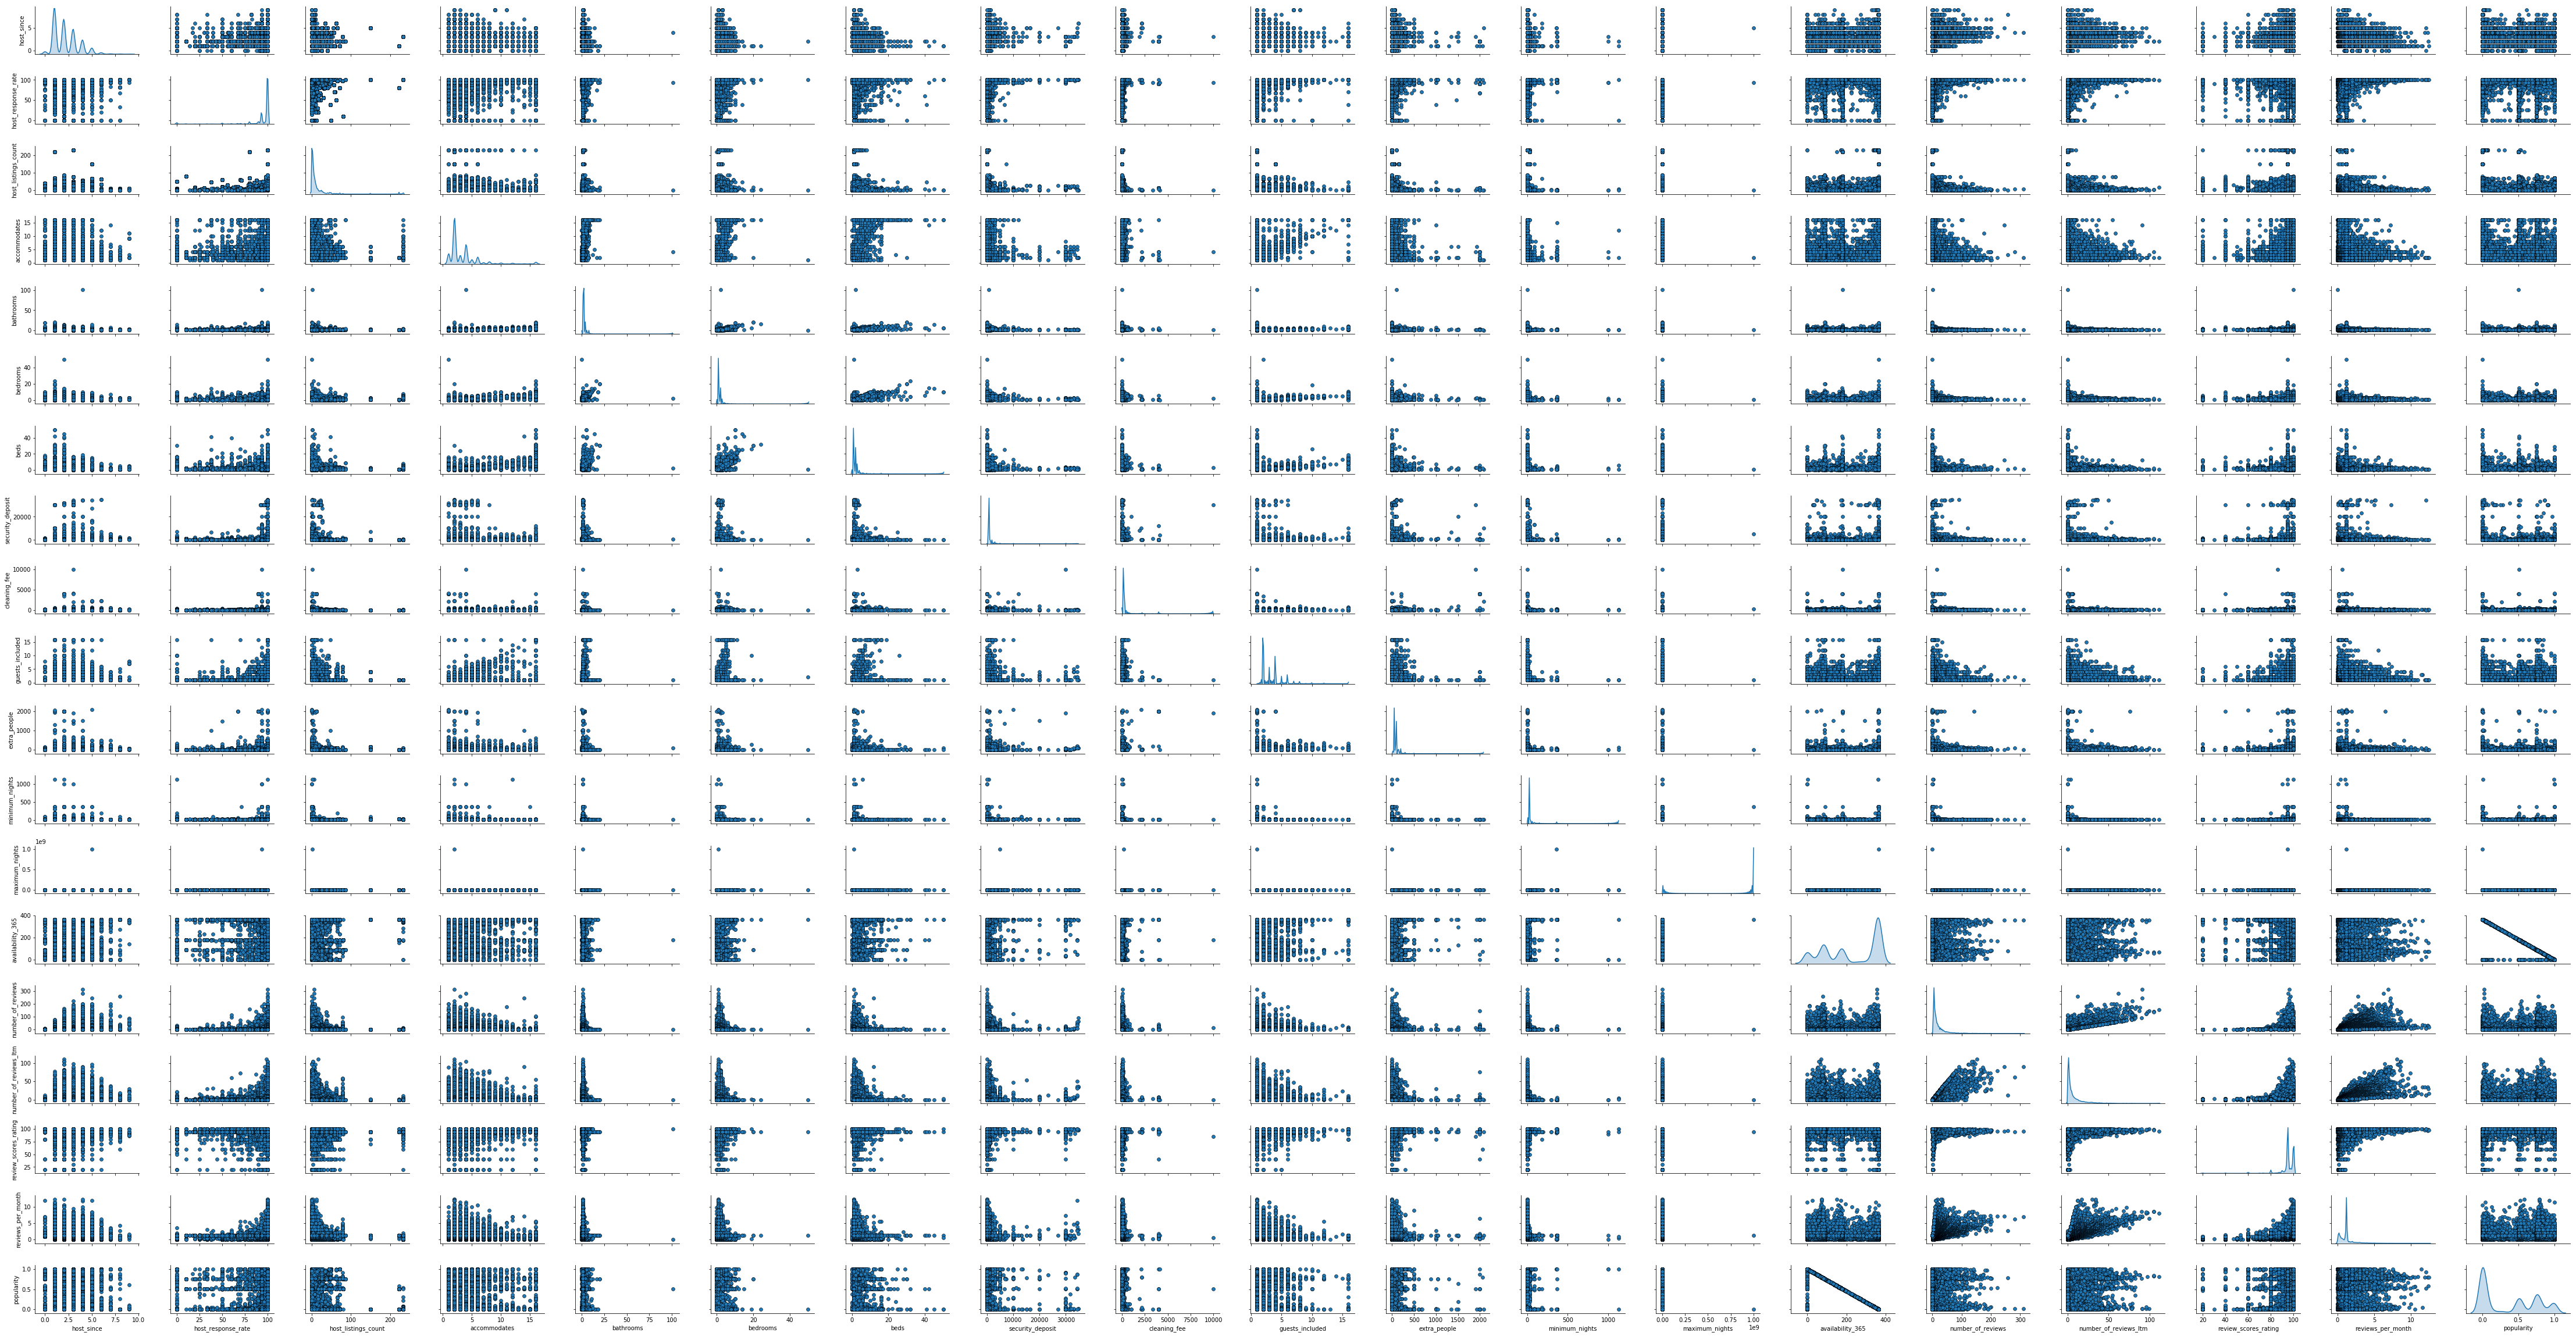

In [105]:
import seaborn as sns
pp = sns.pairplot(data_for_ml[numerical], height=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True)) 
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3) 

As we can see in the picture above, all numerical features are highly-skewed distributions, so we need to apply a log transtion.

In [106]:
numerical.remove('host_since')
data_for_ml[numerical] = data_for_ml[numerical].apply(lambda x:np.log(x+1))

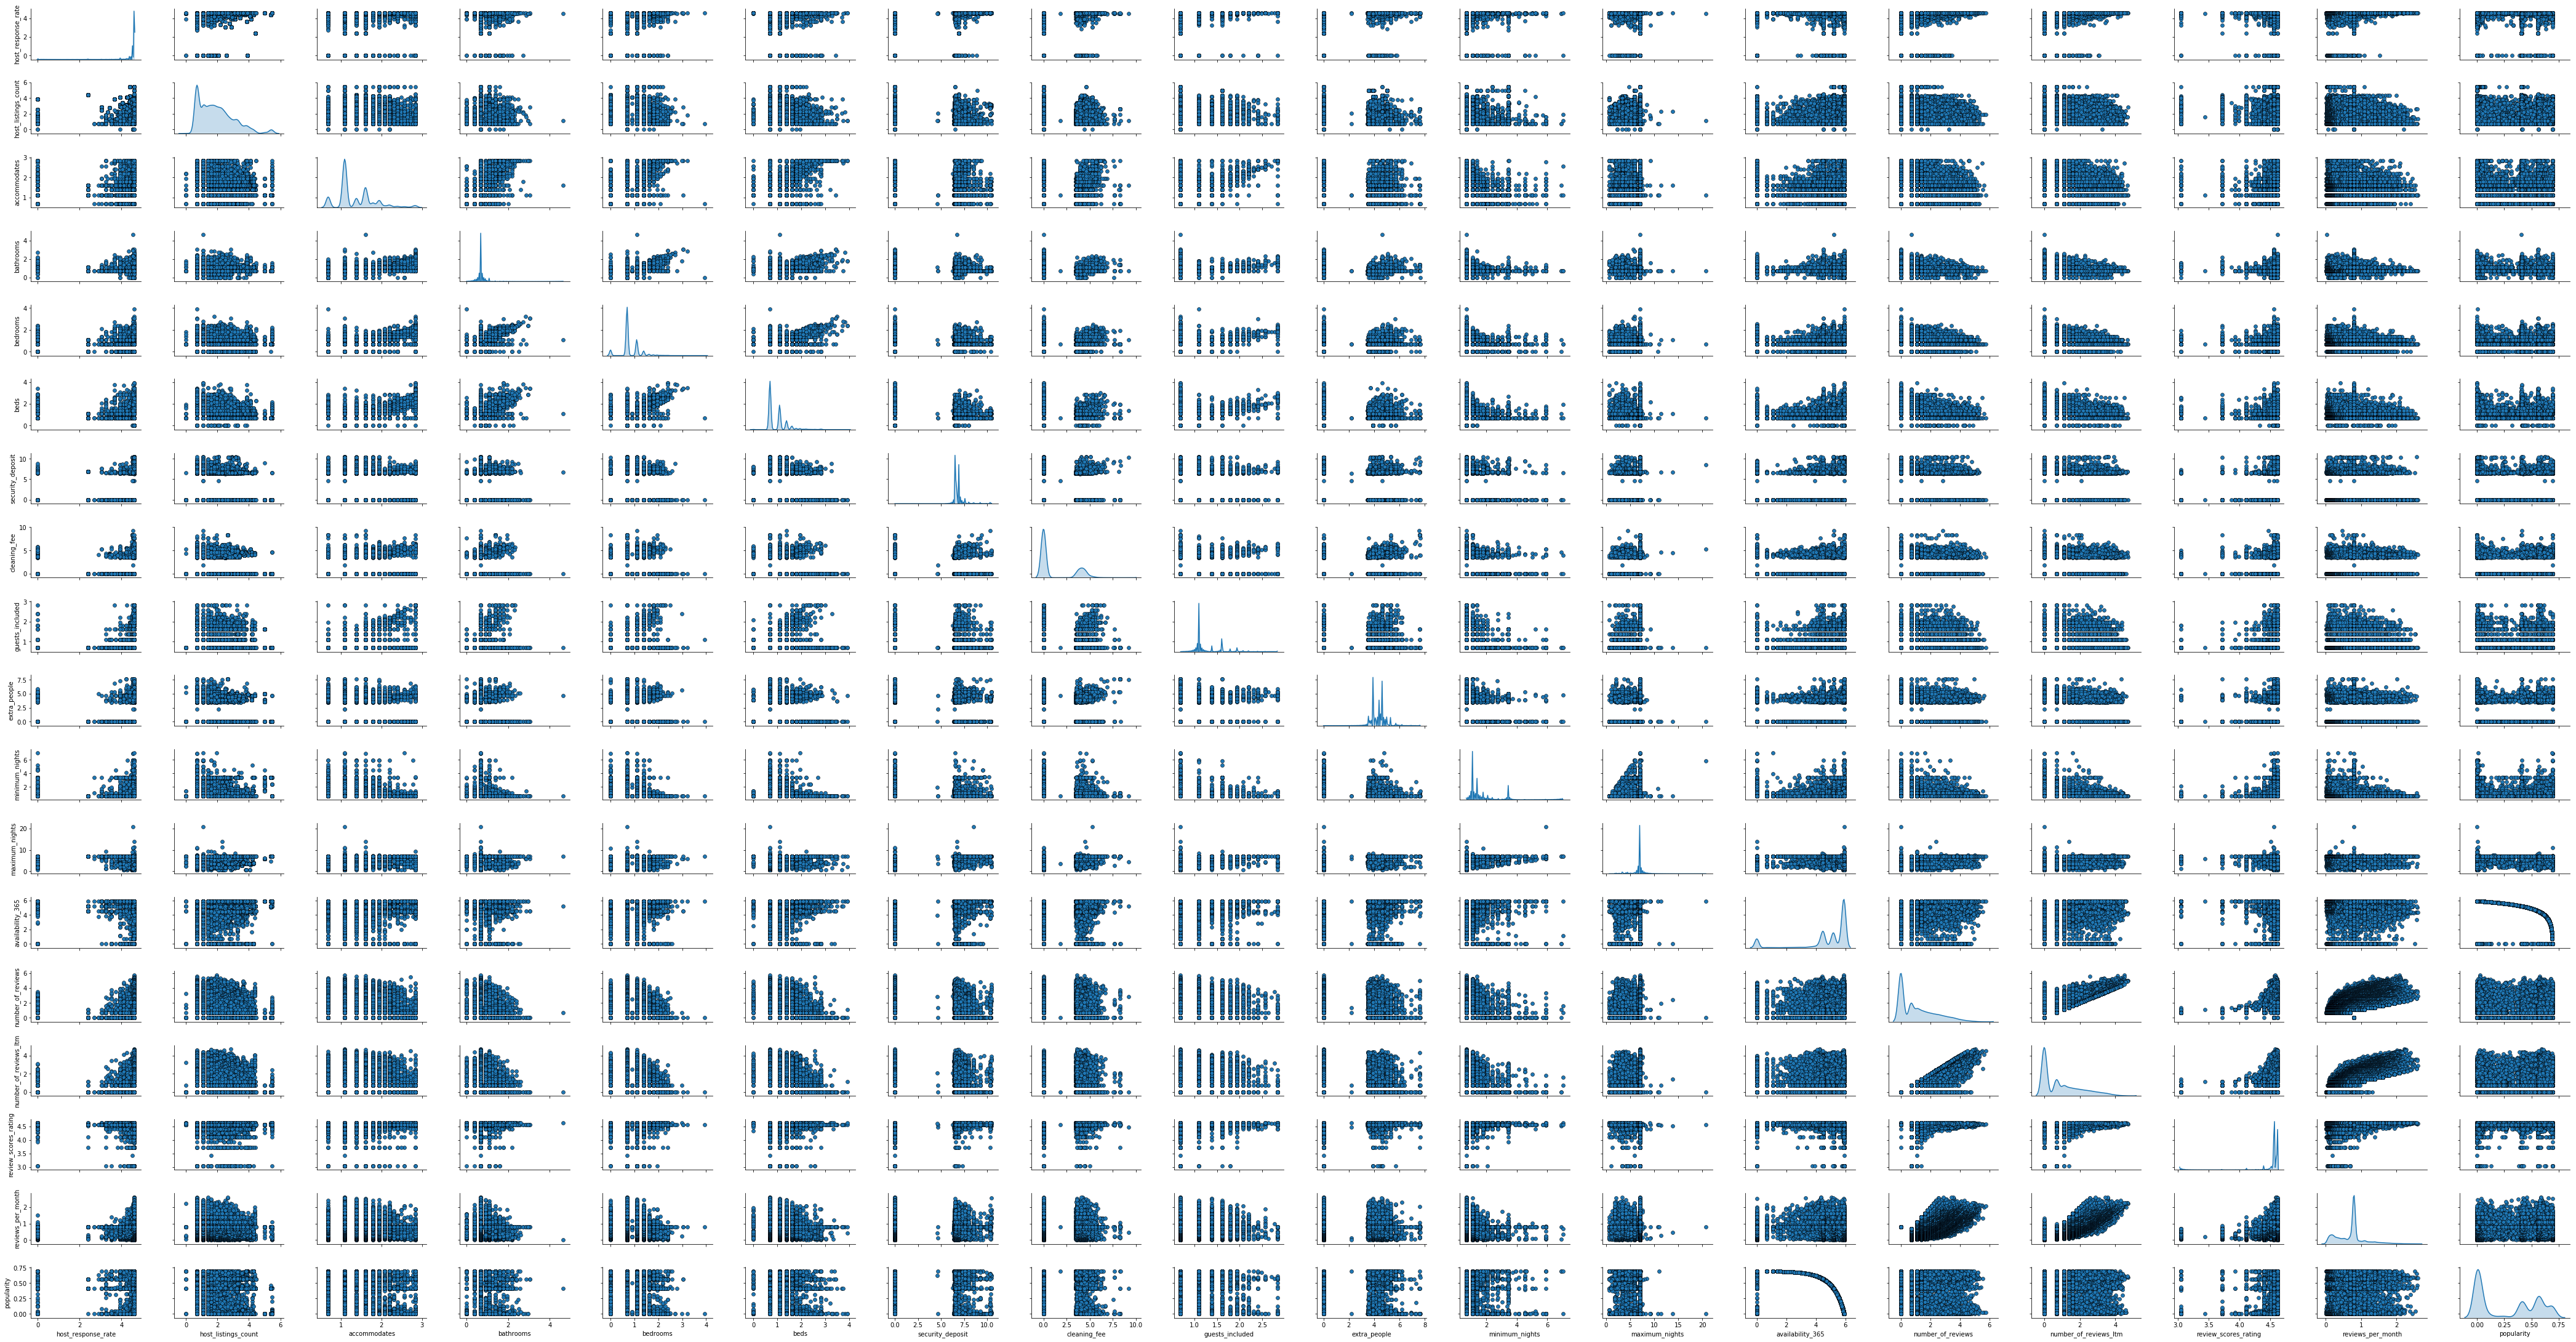

In [107]:
pp = sns.pairplot(data_for_ml[numerical], height=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True)) 
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3) 

However, normalization ensures that each feature is treated equally when applying supervised learners. So,let's do this.

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical.append('host_since')
transformed_data = scaler.fit_transform(data_for_ml[numerical])
cols = data_for_ml[numerical].columns

In [110]:
data_for_ml[numerical] = pd.DataFrame(data=transformed_data,columns=cols)

In [111]:
data_for_ml.to_excel('data_for_ml.xlsx',index=False)

### Split Data to train_data and test_data

In [114]:
from sklearn.model_selection import train_test_split

In [113]:
y = data_for_ml['price']
X = data_for_ml.drop('price',axis=1)

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

### Feature selection

I'd like use RandomForest to estimate feature importances.

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)
importances = rf.feature_importances_

In [140]:
indices = np.argsort(importances)[::-1]

In [121]:
col_name = X_train.columns

In [139]:
rank = 0
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1,30,col_name[indices[f]],importances[indices[f]]))
    rank += 1
    if rank == 100:
        break

 1) cleaning_fee                   0.104068
 2) bathrooms                      0.099555
 3) accommodates                   0.069846
 4) Essentials                     0.043426
 5) bedrooms                       0.032803
 6) property_type_Guest suite      0.032249
 7) neighbourhood_cleansed_昌平区     0.030727
 8) security_deposit               0.027995
 9) Safety card                    0.026112
10) host_total_listings_count      0.023353
11) Smart lock                     0.023121
12) Pets allowed                   0.021376
13) availability_365               0.017417
14) Pool                           0.016198
15) Smoking allowed                0.015929
16) Self check-in                  0.015727
17) host_listings_count            0.014926
18) minimum_nights                 0.014430
19) Wifi                           0.013522
20) First aid kit                  0.013152
21) reviews_per_month              0.013012
22) Private living room            0.012418
23) Breakfast                   

In [150]:
X_train = X_train[col_name[indices][:100]]
X_test = X_test[col_name[indices][:100]]

Look at these importances, I think the price will be hardly predicted...

In [221]:
def bar(x_data,y_data):
    """
    Create a bar plot using x_data and y_data.
    
    Args:
        x_data(list): names of feature.
        y_data(list): values of each feature

    Returns:
        Bar plot.
    """
    c = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis("", y_data)
        .set_global_opts(title_opts=opts.TitleOpts(title="Top Importances of Features"))
    )
    return c
x_data = ['cleaning_fee','bathrooms','accommodates','Essentials','bedrooms']
y_data = [0.104,0.100,0.070,0.043,0.033]
bar(x_data,y_data).render_notebook()
# bar(x_data,y_data).render('Importances.html')

## Price Prediction

In [145]:
from sklearn.tree import DecisionTreeRegressor

In [151]:
tree = DecisionTreeRegressor(random_state=7)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=7, splitter='best')

In [152]:
y_preds = tree.predict(X_test)

In [148]:
from sklearn.metrics import r2_score

In [153]:
r2_score(y_test,y_preds)

-0.555322735116933


## Evaluate the Results

The R-squared values of model is horrible, although the following characteristics have the greatest impact on the price:
`cleaning_fee`,`bathrooms`,`accommodates`,`Essentials` and `bedrooms`,and we can say the more guests a listing can accommodate, the higher price it can be.


# Conclusion

- Listings: we can say the business of Airbnb in Beijing is getting more and more stronger, and the details as follows:  
    - Overall, prices of listings in Beijing are gradually stabilizing.
    - In general, prices will rise in May and October each year which corresponds to Labor Day and National Day vocation.
    - Huairou District has the most expensive middle price and the maximum variance. It's really surprising that the first chair of price is not Dongcheng District where Tiananmen Square located.
    - Fangshan District has the most cheap middle price and Tongzhou District has the minimum variance.
    - The number of listings in Beijing has been keeping increase from 2010, and the increasing speed is getting more and more fast. So, Airbnb business in Beijing is seems good.
    - The increasing speed will be slow down in the first half of the year, and will speed up in the second half of the year.
    - Chaoyang District(朝阳区) is far ahead in total number and growth rate. As of January 2019, the total number of listings in Chaoyang District accounted for 40% of the total number in Beijing.


- Hosts: There are a lot of people have an investment in listings but not help guests experience real local life, and that leading a lower review score, maybe Airbnb should limit some of them. Details as follows:  
    - Almost a half of hosts have more than 2 listings,  some of them are apartment companies, some of them are sublessors , so we can see that there are some people investing or starting a business in Airbnb with listings. 
    - There are 56% of hosts are personal hosts, but they only account for 19.5% of listings. Conversely,  14.5% of hosts are professional hosts, but they account for nearly 55% of listings.
    -  The personal host has the lowest `Proportion of within an hour` and `Host Response Rate`, but has the highest `Average Score`. Meanwhile, the professional hosts has the exact opposite characteristics.